# Default of Credit Card Clients

### Loading libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score, KFold

## 1. Business Problem 

Defaulting on one credit card dues is a problem for many bank customers. It adversely effects your credit score. The bank, however, can observe this trend and predict beforehand which customer may default. This could help in devising a strategy or campaign to notify potential defaultors about their dues or it could enable the bank to segment its customers into defaultors and non-defaultors. 

## 2. About the dataset

The dataset has 30000 rows and 24 columns (23 features and 1 outcome variable). Each row represents a customer of a Taiwan commercial bank in 2005 and it is to be checked how many customers will default in the next month's payment. Data consists of demographic as well as customer's payment status related variables to make this prediction. There are no missing values in this dataset. 

Before processing the dataset to check for the datatypes understood by Python, the following are their dataypes by virtue of the nature of the definition. 

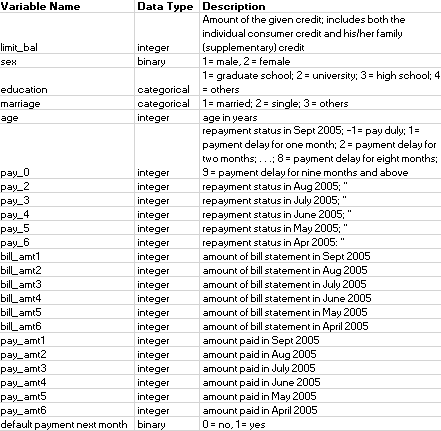

## 3.1. Importing the dataset

In [2]:
dataset_name = input('Name of the dataset: ')

Name of the dataset: default_credit_card.csv


In [3]:
def read_csv(dataset_name):
    original_data = pd.read_csv(dataset_name, sep = ',', header = 0)
    return original_data

## 3.2. Dimensions of the dataset

In [4]:
def dimensions(dataset_name):
    dim = read_csv(dataset_name).shape
    return dim

In [5]:
dimensions(dataset_name)

(30000, 24)

## 4. Conversion of datatypes of variables

### 4.1. Original datatypes of the variables from Python

In [6]:
def data_types(dataset_name):
    return read_csv(dataset_name).dtypes

In [7]:
data_types(dataset_name)

limit_bal                     int64
sex                           int64
education                     int64
marriage                      int64
age                           int64
pay_0                         int64
pay_2                         int64
pay_3                         int64
pay_4                         int64
pay_5                         int64
pay_6                         int64
bill_amt1                     int64
bill_amt2                     int64
bill_amt3                     int64
bill_amt4                     int64
bill_amt5                     int64
bill_amt6                     int64
pay_amt1                      int64
pay_amt2                      int64
pay_amt3                      int64
pay_amt4                      int64
pay_amt5                      int64
pay_amt6                      int64
default payment next month    int64
dtype: object

### 4.2. Conversion of datatypes through Label Encoding

In [8]:
def preprocess_data(dataset_name):
    data = read_csv(dataset_name)
    has_object = any(data.dtypes == 'object')
    has_bool = any(data.dtypes == 'bool')
    
    if has_object or has_bool:
        label_encoder = LabelEncoder()
        for col in data.columns:
            if data[col].dtype == 'object' or data[col].dtype == 'bool':
                data[col] = label_encoder.fit_transform(data[col])
        processed_data = data
    else:
        processed_data = data
    
    return processed_data


In [9]:
preprocess_data(dataset_name).dtypes

limit_bal                     int64
sex                           int64
education                     int64
marriage                      int64
age                           int64
pay_0                         int64
pay_2                         int64
pay_3                         int64
pay_4                         int64
pay_5                         int64
pay_6                         int64
bill_amt1                     int64
bill_amt2                     int64
bill_amt3                     int64
bill_amt4                     int64
bill_amt5                     int64
bill_amt6                     int64
pay_amt1                      int64
pay_amt2                      int64
pay_amt3                      int64
pay_amt4                      int64
pay_amt5                      int64
pay_amt6                      int64
default payment next month    int64
dtype: object

In this dataset, all variables have been detected as integer by Python. 

## 5. Missing Values Detection

In [10]:
def missing_vals(dataset_name):
    return preprocess_data(dataset_name).isna().sum()

In [11]:
missing_vals(dataset_name)

limit_bal                     0
sex                           0
education                     0
marriage                      0
age                           0
pay_0                         0
pay_2                         0
pay_3                         0
pay_4                         0
pay_5                         0
pay_6                         0
bill_amt1                     0
bill_amt2                     0
bill_amt3                     0
bill_amt4                     0
bill_amt5                     0
bill_amt6                     0
pay_amt1                      0
pay_amt2                      0
pay_amt3                      0
pay_amt4                      0
pay_amt5                      0
pay_amt6                      0
default payment next month    0
dtype: int64

There are no missing values in this dataset.

## 6. Descriptive Summary Stats of Dataset

In [12]:
def descr(dataset_name):
    return preprocess_data(dataset_name).describe().applymap('{:.2f}'.format)

In [13]:
descr(dataset_name)

,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default payment next month
count,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,...,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00
mean,167484.32,1.60,1.85,1.55,35.49,-0.02,-0.13,-0.17,-0.22,-0.27,...,43262.95,40311.40,38871.76,5663.58,5921.16,5225.68,4826.08,4799.39,5215.50,0.22
std,129747.66,0.49,0.79,0.52,9.22,1.12,1.20,1.20,1.17,1.13,...,64332.86,60797.16,59554.11,16563.28,23040.87,17606.96,15666.16,15278.31,17777.47,0.42
min,10000.00,1.00,0.00,0.00,21.00,-2.00,-2.00,-2.00,-2.00,-2.00,...,-170000.00,-81334.00,-339603.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,50000.00,1.00,1.00,1.00,28.00,-1.00,-1.00,-1.00,-1.00,-1.00,...,2326.75,1763.00,1256.00,1000.00,833.00,390.00,296.00,252.50,117.75,0.00
50%,140000.00,2.00,2.00,2.00,34.00,0.00,0.00,0.00,0.00,0.00,...,19052.00,18104.50,17071.00,2100.00,2009.00,1800.00,1500.00,1500.00,1500.00,0.00
75%,240000.00,2.00,2.00,2.00,41.00,0.00,0.00,0.00,0.00,0.00,...,54506.00,50190.50,49198.25,5006.00,5000.00,4505.00,4013.25,4031.50,4000.00,0.00
max,1000000.00,2.00,6.00,3.00,79.00,8.00,8.00,8.00,8.00,8.00,...,891586.00,927171.00,961664.00,873552.00,1684259.00,896040.00,621000.00,426529.00,528666.00,1.00


### 6.1. Interpretation of Summary Stats

If apparent variables of limit_bal and bill_amt's and their pay_amt's are compared, then it is clear that on average customers a provided with a 6 figure limit balance. And the fraction of the amount that they have paid for each of the month is much smaller than the amount they were billed. 

For the demographic variables, say age, since the average is around 35 years of age and the standard deviation is about 9 years, it means close to young or middle-aged individuals are a part of this study.

The overall standard deviations are much larger, therefore this implies that there would be more dispersion of data which can also be confirmed in boxplots. 

Lastly, the bill and payment amount's have a larger magnitude than the rest of the variables. So ahead scaling of the table may be introduced.

## 7. Boxplots

In [14]:
def extract_numeric_cols(dataset_name):
    return preprocess_data(dataset_name).select_dtypes(include=['int64', 'float64', 'int32']).columns.tolist()

In [15]:
extract_numeric_cols(dataset_name)

['limit_bal',
 'sex',
 'education',
 'marriage',
 'age',
 'pay_0',
 'pay_2',
 'pay_3',
 'pay_4',
 'pay_5',
 'pay_6',
 'bill_amt1',
 'bill_amt2',
 'bill_amt3',
 'bill_amt4',
 'bill_amt5',
 'bill_amt6',
 'pay_amt1',
 'pay_amt2',
 'pay_amt3',
 'pay_amt4',
 'pay_amt5',
 'pay_amt6',
 'default payment next month']

### 7.1. Boxplots Generation

In [16]:
def boxplots(dataset_name):
    numeric_columns = extract_numeric_cols(dataset_name)
    fig, axs = plt.subplots(1, len(numeric_columns), figsize=(30, 16))

    for i, col in enumerate(numeric_columns):
        axs[i].boxplot(preprocess_data(dataset_name)[col])
        axs[i].set_title(col)

    plt.tight_layout()
    plt.show()

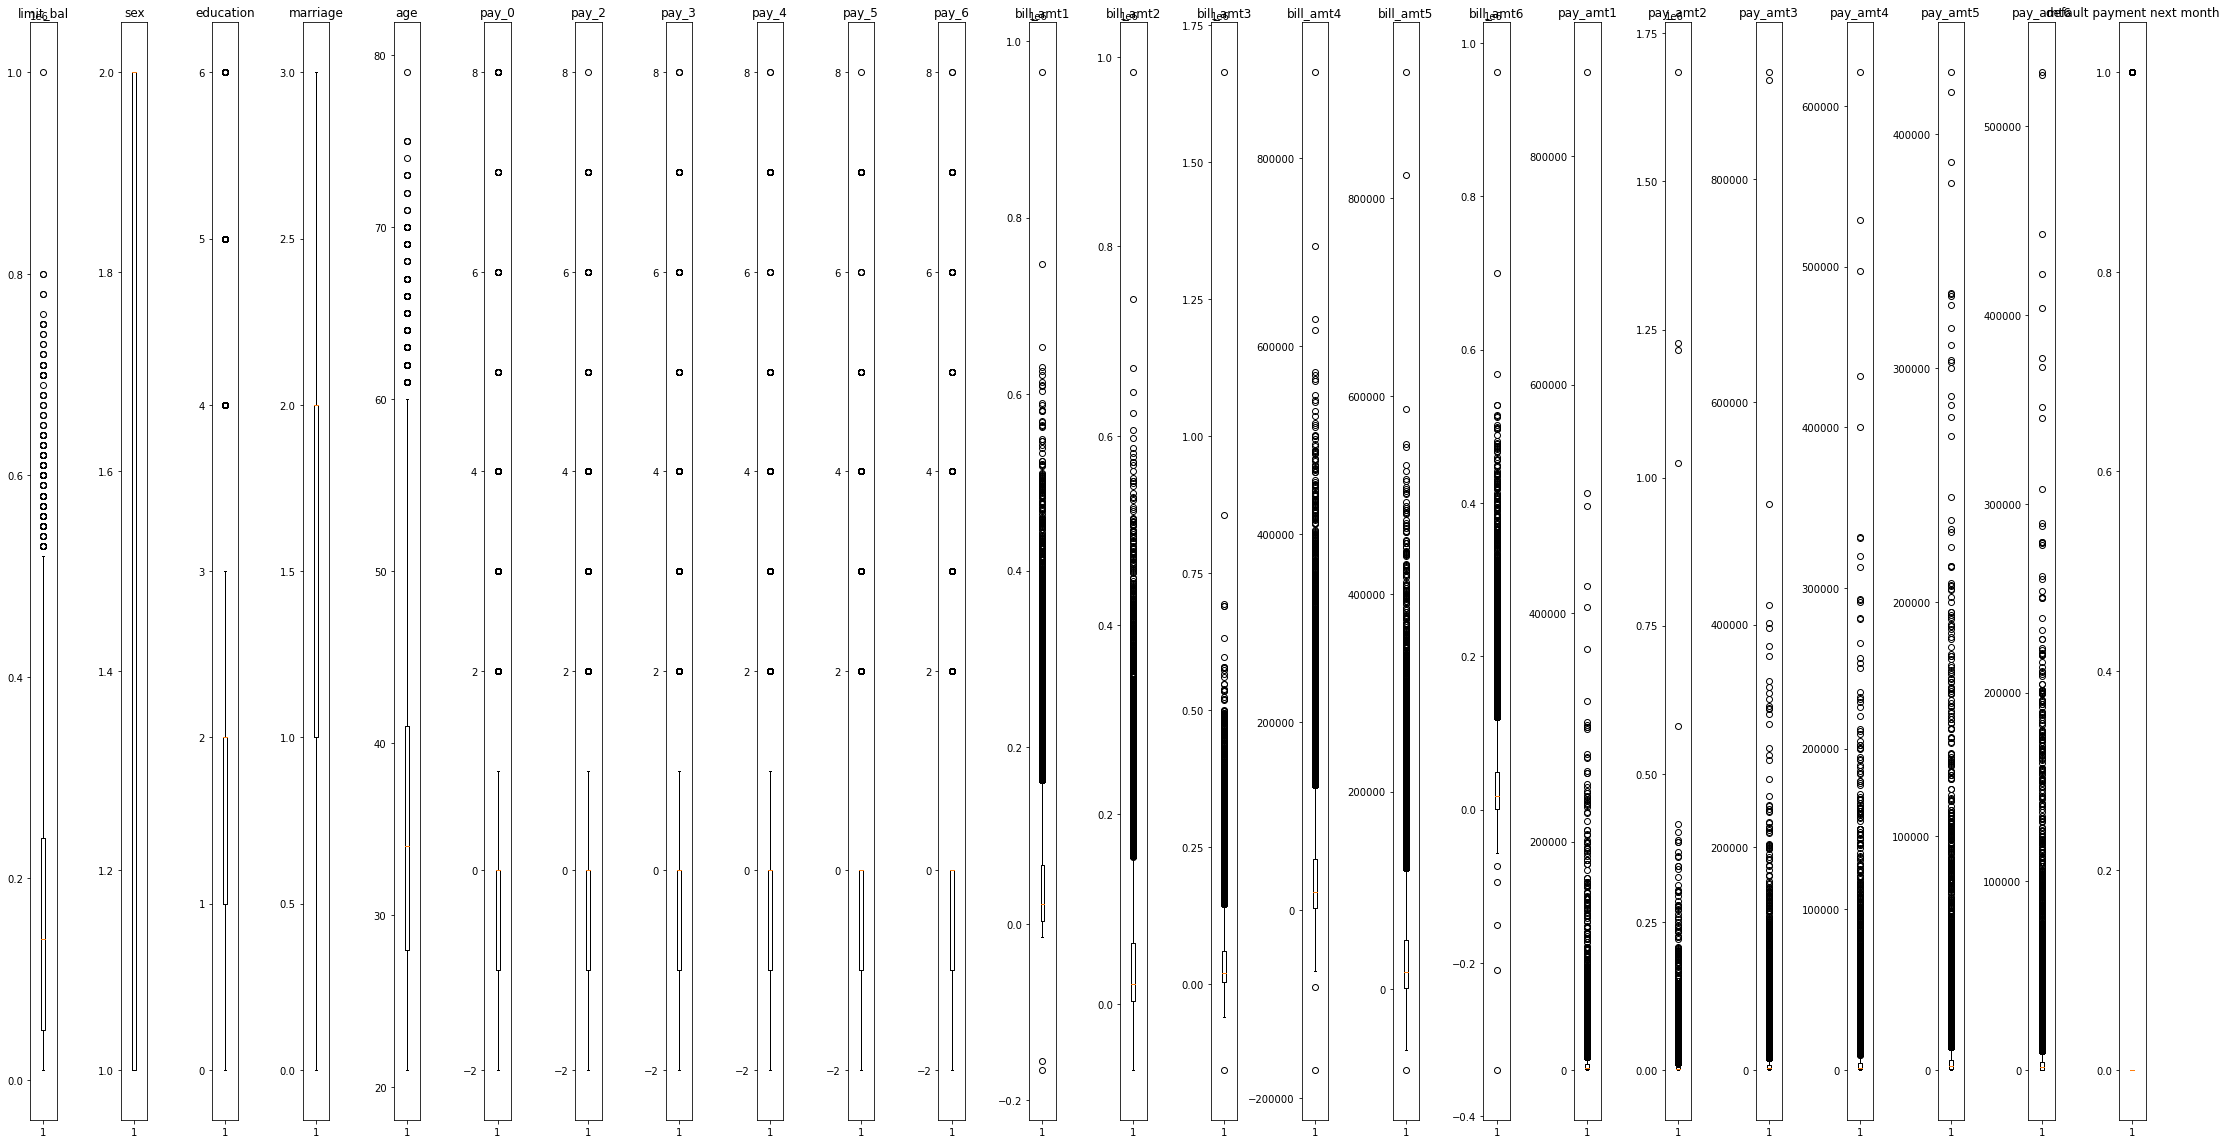

In [17]:
boxplots(dataset_name)

### 7.1.1. Interpretation of Boxplots

In the boxplots, the dispersion of data is evident in the columns of bill_amt's and pay_amt's in the sense that outliers exist in both of them. However, the tail lengths of bill_amt's are far longer than those of pay_amt's. This further corroborates that customers are paying a small fraction of their billed amounts. 

Furthermore, customers are billed higher amounts in the last and first month of billing. bill_amt_6 which is the amount billed in Apr 2005 is the highest than the rest followed by the bill_amt_1 which is that of Sept 2005. So the banks bills them with a large amount initially, and then during the course of next months relatively less. Then in he last month, the amount is increased. 

While in pay_amt's the quartiles are very close to each other and because of outliers, many data points would lie outside of the IQR.

### 7.2. Boxplot Stats

In [18]:
def boxplot_stats(dataset_name):
    column_names = extract_numeric_cols(dataset_name)
    boxplot_stats_list = []
    for column_name in column_names:

        minimum = min(preprocess_data(dataset_name)[column_name])
        maximum = max(preprocess_data(dataset_name)[column_name])
        
        q1 = np.percentile(preprocess_data(dataset_name)[column_name], 25)
        q2 = np.percentile(preprocess_data(dataset_name)[column_name], 50)
        q3 = np.percentile(preprocess_data(dataset_name)[column_name], 75)

        iqr = q3 - q1

        whisker_low = q1 - 1.5 * iqr
        whisker_high = q3 + 1.5 * iqr

        boxplot_stats_list.append({
            'column_name': column_name,
            'whisker_low': whisker_low,
            'min': minimum,
            'q1': q1,
            'q2': q2,
            'q3': q3,
            'whisker_high': whisker_high,
            'max': maximum,
            'iqr': iqr
        })
        
    boxplot_stats_df = pd.DataFrame(boxplot_stats_list).set_index('column_name')
    return boxplot_stats_df.applymap('{:.2f}'.format)

In [19]:
boxplot_stats(dataset_name)

,whisker_low,min,q1,q2,q3,whisker_high,max,iqr
column_name,,,,,,,,
limit_bal,-235000.00,10000.00,50000.00,140000.00,240000.00,525000.00,1000000.00,190000.00
sex,-0.50,1.00,1.00,2.00,2.00,3.50,2.00,1.00
education,-0.50,0.00,1.00,2.00,2.00,3.50,6.00,1.00
marriage,-0.50,0.00,1.00,2.00,2.00,3.50,3.00,1.00
age,8.50,21.00,28.00,34.00,41.00,60.50,79.00,13.00
pay_0,-2.50,-2.00,-1.00,0.00,0.00,1.50,8.00,1.00
pay_2,-2.50,-2.00,-1.00,0.00,0.00,1.50,8.00,1.00
pay_3,-2.50,-2.00,-1.00,0.00,0.00,1.50,8.00,1.00
pay_4,-2.50,-2.00,-1.00,0.00,0.00,1.50,8.00,1.00


It is clear that all the true numeric variables have datapoints that fall outside of the IQR which was identified from the boxplots as well.

### Class Variable Name

In [20]:
def class_var_name():
    class_variable = input('What is the name of the class column? ')
    return class_variable

In [21]:
class_variable = class_var_name()

What is the name of the class column? default payment next month


## 8. Bar and Frequency plots

In [22]:
def cols_for_freq_plots():
    columns_list = input('Enter column names separated by commas: ').split(', ')
    return columns_list

In [23]:
cols_for_freq_plots = cols_for_freq_plots()

Enter column names separated by commas: sex, education, marriage, default payment next month


In [24]:
def frequency_plots(dataset_name, class_variable, cols_for_freq_plots):
    dataset = read_csv(dataset_name)
    num_plots = len(cols_for_freq_plots)
    num_cols = 2
    num_rows = (num_plots + num_cols - 1) // num_cols
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 4*num_rows))

    if num_rows == 1:
        axes = [axes]
    
    for idx, col in enumerate(cols_for_freq_plots):
        row_idx = idx // num_cols
        col_idx = idx % num_cols
        
        ax = axes[row_idx][col_idx]

        sns.countplot(x=col, data=dataset, ax=ax)
        ax.set_title(f'Frequency Plot of {col}')
        ax.set_xlabel(col)
        ax.set_ylabel('Count')
        
    plt.tight_layout()
    plt.show()

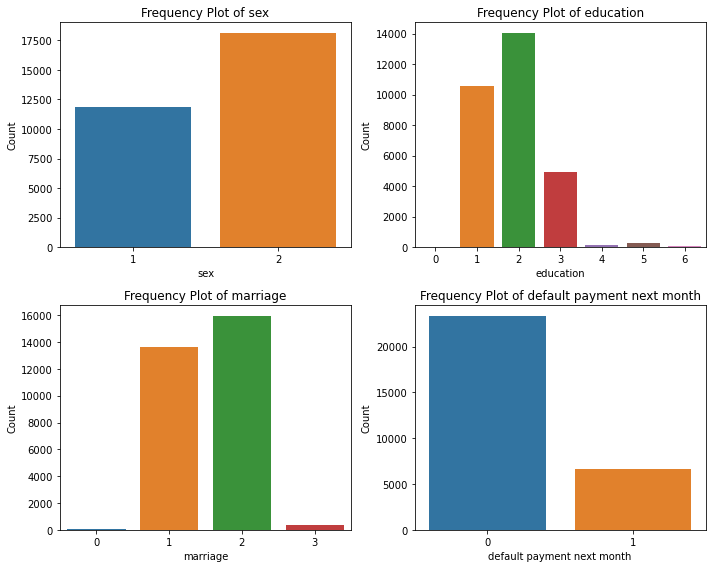

In [25]:
frequency_plots(dataset_name, class_variable, cols_for_freq_plots)

### 8.1. Interpretation of Frequency Plots

Other variables in the dataset which are inherently categorical include: sex, education, marriage and default payment next month. Specific interpretations are as follows:

1) In the class variable, default payment next month's, plot, there were more than 5 times customers who did not default than those who did. Therefore, the class is imbalanced. 

2) There are more females in the bank customer base for this study than males. 

3) Majority of the customers are educated; having attended university and graduate school. 

4) Most of the customers are single, followed by married. 

In [30]:
def cat_cols():
    cat_cols = input('Enter column names separated by commas: ').split(', ')
    return cat_cols

In [31]:
categorical_cols = cat_cols()

Enter column names separated by commas: sex, marriage


In [32]:
def binary_categorical_barplots(dataset_name, class_variable, categorical_cols):
    dataset = read_csv(dataset_name)
    num_plots = len(categorical_cols)
    num_cols = 2
    num_rows = (num_plots + num_cols - 1) // num_cols
    
    if num_plots % 2 != 0:
        num_cols = 1
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 4*num_rows))
    
    if num_rows > 1:  
        for idx, col in enumerate(categorical_cols):
            row_idx = idx // num_cols
            col_idx = idx % num_cols

            ax = axes[row_idx][col_idx]

            sns.countplot(x=col, hue=class_variable, data=dataset, ax=ax)
            ax.set_title(f'Bar Plot of {col} vs {class_variable}')
            ax.set_xlabel(col)
            ax.set_ylabel('Count')
            ax.legend(title=class_variable)
    else:  
        for idx, col in enumerate(categorical_cols):
            ax = axes[idx]

            sns.countplot(x=col, hue=class_variable, data=dataset, ax=ax)
            ax.set_title(f'Bar Plot of {col} vs {class_variable}')
            ax.set_xlabel(col)
            ax.set_ylabel('Count')
            ax.legend(title=class_variable)
        
    plt.tight_layout()
    plt.show()

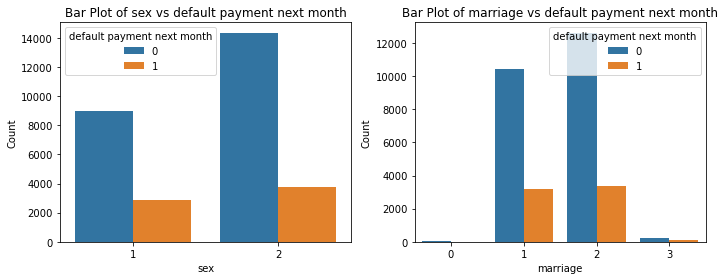

In [33]:
binary_categorical_barplots(dataset_name, class_variable, categorical_cols)

### 8.2. Interpretation of Categorical Bar Plots

1) Of both males and females, majority will not default. Few will no default. However, of males or females who do default, females defaultors would be greater than male defaultors. 

2) Of single and married, majority will not default. 

# 9. Scaling the data

Due to the values of amounts of payments being much larger than then rest of the explanatory variables, all the predictor variables have been scaled using the MinMaxScaler. 

In [34]:
def normalize_data(dataset_name, class_variable):
    processed_data = preprocess_data(dataset_name)
    
    X = processed_data.drop(columns=[class_variable])
    y = processed_data[class_variable]

    scaler = MinMaxScaler()
    X_normalized = scaler.fit_transform(X)
    
    normalized_data = pd.concat([pd.DataFrame(X_normalized, columns=X.columns), y], axis=1)
    
    return normalized_data

In [35]:
normalize_data(dataset_name, class_variable)

,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default payment next month
0,0.010101,1.0,0.333333,0.333333,0.051724,0.4,0.4,0.1,0.1,0.0,...,0.160138,0.080648,0.260979,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000,1
1,0.111111,1.0,0.333333,0.666667,0.086207,0.1,0.4,0.2,0.2,0.2,...,0.163220,0.084074,0.263485,0.000000,0.000594,0.001116,0.001610,0.000000,0.003783,1
2,0.080808,1.0,0.333333,0.666667,0.224138,0.2,0.2,0.2,0.2,0.2,...,0.173637,0.095470,0.272928,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458,0
3,0.040404,1.0,0.333333,0.333333,0.275862,0.2,0.2,0.2,0.2,0.2,...,0.186809,0.109363,0.283685,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892,0
4,0.040404,0.0,0.333333,0.333333,0.620690,0.1,0.2,0.1,0.2,0.2,...,0.179863,0.099633,0.275681,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.212121,0.0,0.500000,0.333333,0.310345,0.2,0.2,0.2,0.2,0.2,...,0.243036,0.111622,0.273259,0.009730,0.011875,0.005583,0.004907,0.011723,0.001892,0
29996,0.141414,0.0,0.500000,0.666667,0.379310,0.1,0.1,0.1,0.1,0.2,...,0.168596,0.085794,0.260979,0.002103,0.002094,0.010042,0.000208,0.000000,0.000000,0
29997,0.020202,0.0,0.333333,0.666667,0.275862,0.6,0.5,0.4,0.1,0.2,...,0.179805,0.101057,0.275854,0.000000,0.000000,0.024552,0.006763,0.004689,0.005864,1
29998,0.070707,0.0,0.500000,0.333333,0.344828,0.3,0.1,0.2,0.2,0.2,...,0.209850,0.092403,0.298591,0.098334,0.002024,0.001315,0.003101,0.124174,0.003412,1


## 10. Correlation Analysis

In [36]:
def corr_heatmap(dataset_name, class_variable):
    corr_matrix = normalize_data(dataset_name, class_variable).corr()
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', annot=True, fmt='.2f', linewidths=.5)
    
    plt.title('Correlation Heatmap')
    plt.show()


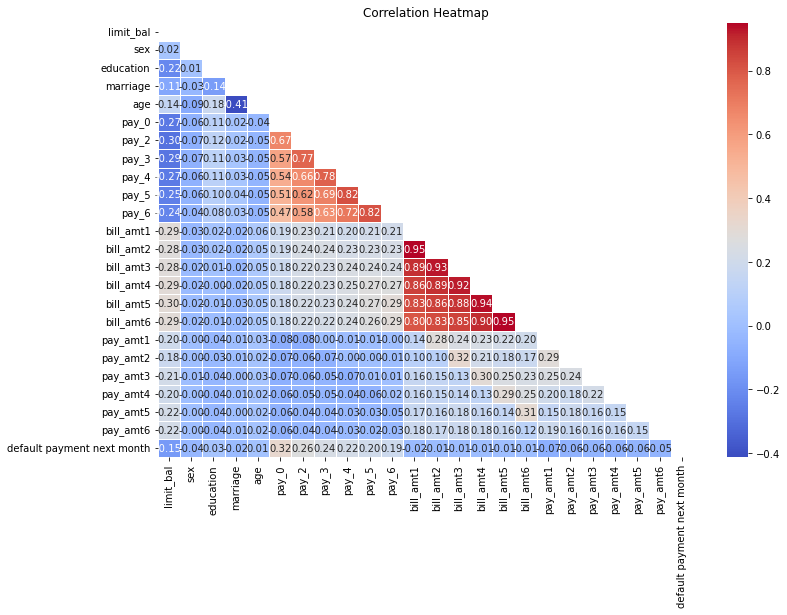

In [37]:
corr_heatmap(dataset_name, class_variable)

### 10.1. Interpretation of Correlation Heatmap

The observations from the correlation heatmap are as follows:

1) The bill amounts of each of the months are very strongly correlated to each other. And so are the levels of the payments. If a customer gets a higher amount billed in the preceeding month, then the next month's bill could also be greater. 

2) Also surprisingly with the class variable, default payment next month, almost all of the main predictors have extremely weak correlation. 

## 11. Feature Selection 

Features have been selected through an approach using the correlations with the outcome variable. Those variables with absolute correlation between 0.2 and 1.0 with the outcome variable will be selected. Rest will be dropped. 

The idea is to choose variables with close to moderate to strong correlation with the class variable.

In [38]:
def feature_selection_by_corr(dataset_name, class_variable):
    corr_matrix = normalize_data(dataset_name, class_variable).corr()
    corr_with_target = corr_matrix[class_variable].drop(class_variable)

    ranked_features_df = pd.DataFrame({'Feature': corr_with_target.index, 'Correlation': corr_with_target.values})
    ranked_features_df.sort_values(by='Correlation', ascending=False, inplace=True)
    
    selected_features = ranked_features_df[(abs(ranked_features_df['Correlation']) >= 0.2) & (abs(ranked_features_df['Correlation']) <= 1.0)]['Feature'].tolist()
    
    return selected_features


In [39]:
feature_selection_by_corr(dataset_name, class_variable)

['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5']

In [40]:
def drop_unselected_features(dataset_name, class_variable):
    dataset = normalize_data(dataset_name, class_variable)
    
    selected_features = feature_selection_by_corr(dataset_name, class_variable)
    selected_dataset = dataset[selected_features + [class_variable]]

    return selected_dataset

In [41]:
drop_unselected_features(dataset_name, class_variable)

,pay_0,pay_2,pay_3,pay_4,pay_5,default payment next month
0,0.4,0.4,0.1,0.1,0.0,1
1,0.1,0.4,0.2,0.2,0.2,1
2,0.2,0.2,0.2,0.2,0.2,0
3,0.2,0.2,0.2,0.2,0.2,0
4,0.1,0.2,0.1,0.2,0.2,0
...,...,...,...,...,...,...
29995,0.2,0.2,0.2,0.2,0.2,0
29996,0.1,0.1,0.1,0.1,0.2,0
29997,0.6,0.5,0.4,0.1,0.2,1
29998,0.3,0.1,0.2,0.2,0.2,1


In [42]:
def dimensions2(dataset_name, class_variable):
    dim = drop_unselected_features(dataset_name, class_variable).shape
    return dim

In [43]:
dimensions2(dataset_name, class_variable)

(30000, 6)

This processed and feature selected data is what will be used for model training and evaluating from this point onwards. The data now has 30000 rows and 6 columns (5 predictor variables and 1 outcome variable).

## 12. Data Splits with selected features only

In [44]:
def tvt_splits_fs(dataset_name, class_variable):
    y = drop_unselected_features(dataset_name, class_variable)[[class_variable]]
    X = drop_unselected_features(dataset_name, class_variable).drop(columns = [class_variable])
    # X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(read_csv(data), target = class_variable, train_size=0.6, valid_size=0.2, test_size=0.2, random_state = None) 
    
    total_size = len(preprocess_data(dataset_name))
    train_size = int(total_size * 0.6)
    valid_size = int(total_size * 0.2)

    # Split the data
    X_train, y_train = drop_unselected_features(dataset_name, class_variable).iloc[:train_size, :-1], drop_unselected_features(dataset_name, class_variable).iloc[:train_size, -1]
    X_valid, y_valid = drop_unselected_features(dataset_name, class_variable).iloc[train_size:train_size+valid_size, :-1], drop_unselected_features(dataset_name, class_variable).iloc[train_size:train_size+valid_size, -1]
    X_test, y_test = drop_unselected_features(dataset_name, class_variable).iloc[train_size+valid_size:, :-1], drop_unselected_features(dataset_name, class_variable).iloc[train_size+valid_size:, -1]
    
    y_train = pd.Series(y_train).to_frame(name=class_variable)
    y_valid = pd.Series(y_valid).to_frame(name=class_variable)
    y_test = pd.Series(y_test).to_frame(name=class_variable)
    
    return X_train, X_valid, X_test, y_train, y_valid, y_test

In [45]:
def splits_tabulated_fs(dataset_name, class_variable):
    X_train, X_valid, X_test, y_train, y_valid, y_test = tvt_splits_fs(dataset_name, class_variable)
    
    dataframes = [X_train, X_valid, X_test, y_train, y_valid, y_test]

    dataframe_names = ['X_train', 'X_valid', 'X_test', 'y_train', 'y_valid', 'y_test']

    dataframe_shapes = {}
    for i, dataframe in enumerate(dataframes):
        dataframe_shapes[dataframe_names[i]] = dataframe.shape

    shape_train_test = pd.DataFrame.from_dict(dataframe_shapes, orient='index', columns=['Rows', 'Columns'])

    return shape_train_test

In [46]:
splits_tabulated_fs(dataset_name, class_variable)

,Rows,Columns
X_train,18000,5
X_valid,6000,5
X_test,6000,5
y_train,18000,1
y_valid,6000,1
y_test,6000,1


## 13. Applying and Evaluating model without CV

In [47]:
def model_without_CV(dataset_name, class_variable):
    X_train, X_valid, X_test, y_train, y_valid, y_test = tvt_splits_fs(dataset_name, class_variable)

    y_train = y_train.values.ravel()
    y_valid = y_valid.values.ravel()
    y_test = y_test.values.ravel()

    knn = KNeighborsClassifier(n_neighbors=5) 

    # Train
    knn.fit(X_train, y_train)

    y_pred_train = knn.predict(X_train)

    print('ROC for Train Set:')
    fpr_train, tpr_train, _ = roc_curve(y_train, knn.predict_proba(X_train)[:, 1])
    auc_train = roc_auc_score(y_train, knn.predict_proba(X_train)[:, 1])
    plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label=f'ROC curve (area = {auc_train:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve (Train Set)')
    plt.legend(loc='lower right')
    plt.show()
    
    print('Train Set Metrics:')
    print(classification_report(y_train, y_pred_train))
    
    precision_train = precision_score(y_train, y_pred_train)
    recall_train = recall_score(y_train, y_pred_train)
    f1_train = f1_score(y_train, y_pred_train)
    print(f'Train Precision: {precision_train:.4f}')
    print(f'Train Recall: {recall_train:.4f}')
    print(f'Train F1-score: {f1_train:.4f}')
    print(f'Train AUC: {auc_train:.4f}\n')

    # Valid
    y_pred_valid = knn.predict(X_valid)

    print('ROC for Validation Set:')
    fpr_valid, tpr_valid, _ = roc_curve(y_valid, knn.predict_proba(X_valid)[:, 1])
    auc_valid = roc_auc_score(y_valid, knn.predict_proba(X_valid)[:, 1])
    plt.plot(fpr_valid, tpr_valid, color='darkorange', lw=2, label=f'ROC curve (area = {auc_valid:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve (Validation Set)')
    plt.legend(loc='lower right')
    plt.show()
    
    print('Validation Set Metrics:')
    print(classification_report(y_valid, y_pred_valid))
    
    precision_valid = precision_score(y_valid, y_pred_valid)
    recall_valid = recall_score(y_valid, y_pred_valid)
    f1_valid = f1_score(y_valid, y_pred_valid)
    print(f'Validation Precision: {precision_valid:.4f}')
    print(f'Validation Recall: {recall_valid:.4f}')
    print(f'Validation F1-score: {f1_valid:.4f}')
    print(f'Validation AUC: {auc_valid:.4f}\n')

    # Test
    y_pred_test = knn.predict(X_test)

    print('ROC for Test Set:')
    fpr_test, tpr_test, _ = roc_curve(y_test, knn.predict_proba(X_test)[:, 1])
    auc_test = roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1])
    plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'ROC curve (area = {auc_test:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve (Test Set)')
    plt.legend(loc='lower right')
    plt.show()
    
    print('Test Set Metrics:')
    print(classification_report(y_test, y_pred_test))
    
    precision_test = precision_score(y_test, y_pred_test)
    recall_test = recall_score(y_test, y_pred_test)
    f1_test = f1_score(y_test, y_pred_test)
    print(f'Test Precision: {precision_test:.4f}')
    print(f'Test Recall: {recall_test:.4f}')
    print(f'Test F1-score: {f1_test:.4f}')
    print(f'Test AUC: {auc_test:.4f}')

ROC for Train Set:


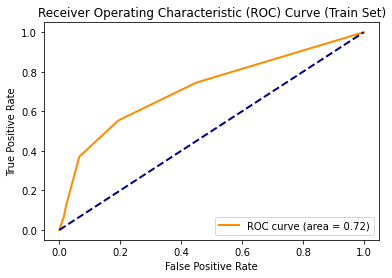

Train Set Metrics:
              precision    recall  f1-score   support

           0       0.83      0.93      0.88     13850
           1       0.63      0.37      0.47      4150

    accuracy                           0.80     18000
   macro avg       0.73      0.65      0.67     18000
weighted avg       0.79      0.80      0.78     18000

Train Precision: 0.6289
Train Recall: 0.3708
Train F1-score: 0.4666
Train AUC: 0.7177

ROC for Validation Set:


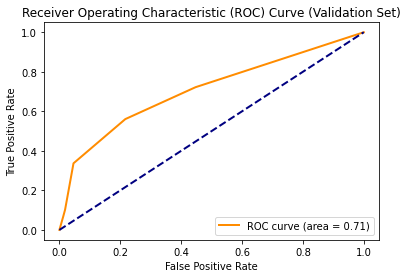

Validation Set Metrics:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      4780
           1       0.65      0.34      0.44      1220

    accuracy                           0.83      6000
   macro avg       0.75      0.65      0.67      6000
weighted avg       0.81      0.83      0.81      6000

Validation Precision: 0.6503
Validation Recall: 0.3369
Validation F1-score: 0.4438
Validation AUC: 0.7073

ROC for Test Set:


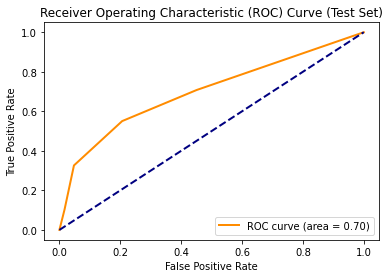

Test Set Metrics:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4734
           1       0.65      0.33      0.43      1266

    accuracy                           0.82      6000
   macro avg       0.74      0.64      0.66      6000
weighted avg       0.80      0.82      0.80      6000

Test Precision: 0.6463
Test Recall: 0.3262
Test F1-score: 0.4336
Test AUC: 0.6998


In [48]:
model_without_CV(dataset_name, class_variable)

## 14. Applying and Evaluating Model with CV

In [49]:
def model_with_CV(dataset_name, class_variable):
    X_train_valid, X_test, y_train_valid, y_test = train_test_split(drop_unselected_features(dataset_name, class_variable).drop(columns=[class_variable]), drop_unselected_features(dataset_name, class_variable)[class_variable], test_size=0.2, random_state=42)
    y_train_valid = pd.Series(y_train_valid).to_frame(name=class_variable)
    y_test = pd.Series(y_test).to_frame(name=class_variable)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2

    knn = KNeighborsClassifier(n_neighbors=5)
    k = 5

    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    cv_scores = cross_val_score(knn, X_train_valid, y_train_valid.values.ravel(), cv=kf, scoring='accuracy')  # Example metric: accuracy
    best_score_index = cv_scores.argmax()
    best_knn = KNeighborsClassifier(n_neighbors=5) 
    best_knn.fit(X_train_valid, y_train_valid.values.ravel())

    y_pred_train = best_knn.predict(X_train)
    fpr_train, tpr_train, _ = roc_curve(y_train.values.ravel(), best_knn.predict_proba(X_train)[:, 1])
    auc_train = roc_auc_score(y_train.values.ravel(), best_knn.predict_proba(X_train)[:, 1])
    
    plt.figure()
    plt.plot(fpr_train, tpr_train, color='orange', lw=2, label=f'ROC curve (area = {auc_train:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (Train Set)')
    plt.legend(loc='lower right')
    plt.show()
    
    print('Train Set Metrics:')
    train_report = classification_report(y_train.values.ravel(), y_pred_train)
    print(train_report)
    
    train_precision = precision_score(y_train.values.ravel(), y_pred_train, average='weighted')
    train_recall = recall_score(y_train.values.ravel(), y_pred_train, average='weighted')
    train_f1 = f1_score(y_train.values.ravel(), y_pred_train, average='weighted')
    print(f'Train Overall Precision: {train_precision:.4f}')
    print(f'Train Overall Recall: {train_recall:.4f}')
    print(f'Train Overall F1-score: {train_f1:.4f}\n')

    y_pred_valid = best_knn.predict(X_valid)
    fpr_valid, tpr_valid, _ = roc_curve(y_valid.values.ravel(), best_knn.predict_proba(X_valid)[:, 1])
    auc_valid = roc_auc_score(y_valid.values.ravel(), best_knn.predict_proba(X_valid)[:, 1])

    plt.figure()
    plt.plot(fpr_valid, tpr_valid, color='orange', lw=2, label=f'ROC curve (area = {auc_valid:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (Validation Set)')
    plt.legend(loc='lower right')
    plt.show()

    print('Validation Set Metrics:')
    valid_report = classification_report(y_valid.values.ravel(), y_pred_valid)
    print(valid_report)

    valid_precision = precision_score(y_valid.values.ravel(), y_pred_valid, average='weighted')
    valid_recall = recall_score(y_valid.values.ravel(), y_pred_valid, average='weighted')
    valid_f1 = f1_score(y_valid.values.ravel(), y_pred_valid, average='weighted')
    print(f'Validation Overall Precision: {valid_precision:.4f}')
    print(f'Validation Overall Recall: {valid_recall:.4f}')
    print(f'Validation Overall F1-score: {valid_f1:.4f}\n')

    y_pred_test = best_knn.predict(X_test)
    fpr_test, tpr_test, _ = roc_curve(y_test.values.ravel(), best_knn.predict_proba(X_test)[:, 1])
    auc_test = roc_auc_score(y_test.values.ravel(), best_knn.predict_proba(X_test)[:, 1])

    plt.figure()
    plt.plot(fpr_test, tpr_test, color='orange', lw=2, label=f'ROC curve (area = {auc_test:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (Test Set)')
    plt.legend(loc='lower right')
    plt.show()

    print('Test Set Metrics:')
    test_report = classification_report(y_test.values.ravel(), y_pred_test)
    print(test_report)
    
    test_precision = precision_score(y_test.values.ravel(), y_pred_test, average='weighted')
    test_recall = recall_score(y_test.values.ravel(), y_pred_test, average='weighted')
    test_f1 = f1_score(y_test.values.ravel(), y_pred_test, average='weighted')
    print(f'Test Overall Precision: {test_precision:.4f}')
    print(f'Test Overall Recall: {test_recall:.4f}')
    print(f'Test Overall F1-score: {test_f1:.4f}')

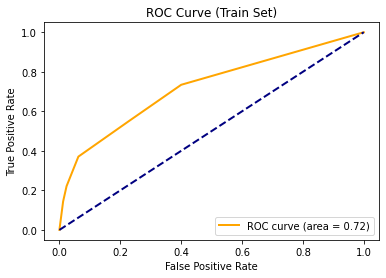

Train Set Metrics:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89     13993
           1       0.63      0.37      0.47      4007

    accuracy                           0.81     18000
   macro avg       0.73      0.65      0.68     18000
weighted avg       0.79      0.81      0.79     18000

Train Overall Precision: 0.7924
Train Overall Recall: 0.8115
Train Overall F1-score: 0.7923



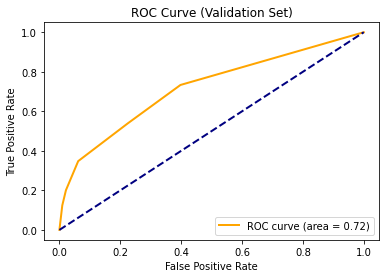

Validation Set Metrics:
              precision    recall  f1-score   support

           0       0.84      0.94      0.88      4684
           1       0.61      0.35      0.44      1316

    accuracy                           0.81      6000
   macro avg       0.72      0.64      0.66      6000
weighted avg       0.79      0.81      0.79      6000

Validation Overall Precision: 0.7876
Validation Overall Recall: 0.8088
Validation Overall F1-score: 0.7879



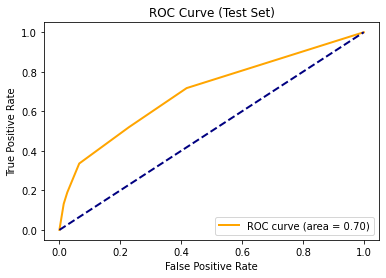

Test Set Metrics:
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      4687
           1       0.59      0.34      0.43      1313

    accuracy                           0.80      6000
   macro avg       0.71      0.64      0.65      6000
weighted avg       0.78      0.80      0.78      6000

Test Overall Precision: 0.7809
Test Overall Recall: 0.8038
Test Overall F1-score: 0.7824


In [50]:
model_with_CV(dataset_name, class_variable)

## 15. Summary of Model Results

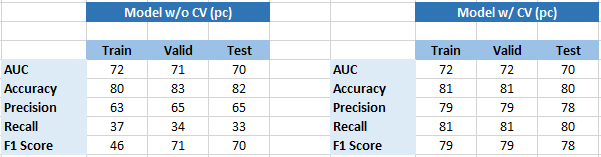

### 15.1. Interpretation with more focus on With CV Test Set metrics

First observation is that the model performs well in the training set and subsequently the performance deteriorates in the validation and test sets. However, in the case of this dataset, the perfomances in each of the sets don't waiver as much when it comes to accuracies and the AUCs.

Second, it is clear that cross validation has helped improve the model performance. AUC and accuracy are equal or higher in each of the sets in the with CV as compared to no CV.

Metrics of accuracy, recall, precision, f1-score and AUC will be explained through the with CV Test set numbers as follows:

1) **Accuracy:** The model correctly predicts customer who either will and won't deafult 80% of the time. Although this is good accuracy, it may be misleading because of class variable is imbalanced. Majority customers did not default. 

2) **Recall:** The overall recall is 80%. However, the recall for defaulting is 34% which means that of all actual default instances in the test set, the model correctly predicted 34% of them and missed 66%. 

3) **Precision:** The overall precision was 78% but the precision for defaulting is 59%. This means that of all the instances predicted as default, 59% of them were actually defaults. 

4) **F1-Score:** The overall f1-score is 78% but for the defaulting class it is 43% which implies that the accuracy of predicting the default correctly is moderate. 

5) **AUC:** The probability that the model predicts a default than a non-defaultor is 70%. 

Note: Of each of the 0,1 classes of the outcome variable, the higher percentage rested with the 0 class owing to the imbalance in the column.

## 16. Compiled Master Function

In [51]:
def master_function():
    dataset_name = input('Name of the dataset: ')
    data = read_csv(dataset_name)
    print(dimensions(dataset_name))
    print(data_types(dataset_name))
    preprocess_data(dataset_name)
    print(missing_vals(dataset_name))
    print(descr(dataset_name))
    extract_numeric_cols(dataset_name)
    boxplots(dataset_name)
    print(boxplot_stats(dataset_name))
    class_variable = class_var_name()
    def cols_for_freq_plots():
        columns_list = input('Enter column names separated by commas: ').split(', ')
        return columns_list
    cols_for_freq_plots = cols_for_freq_plots()
    frequency_plots(dataset_name, class_variable, cols_for_freq_plots)
    def cat_cols():
        cat_cols = input('Enter column names separated by commas: ').split(', ')
        return cat_cols
    categorical_cols = cat_cols()
    binary_categorical_barplots(dataset_name, class_variable, categorical_cols)
    normalize_data(dataset_name, class_variable)
    corr_heatmap(dataset_name, class_variable)
    feature_selection_by_corr(dataset_name, class_variable)
    drop_unselected_features(dataset_name, class_variable)
    dimensions2(dataset_name, class_variable)
    tvt_splits_fs(dataset_name, class_variable)
    print(splits_tabulated_fs(dataset_name, class_variable))
    model_without_CV(dataset_name, class_variable)
    model_with_CV(dataset_name, class_variable)

Name of the dataset: default_credit_card.csv
(30000, 24)
limit_bal                     int64
sex                           int64
education                     int64
marriage                      int64
age                           int64
pay_0                         int64
pay_2                         int64
pay_3                         int64
pay_4                         int64
pay_5                         int64
pay_6                         int64
bill_amt1                     int64
bill_amt2                     int64
bill_amt3                     int64
bill_amt4                     int64
bill_amt5                     int64
bill_amt6                     int64
pay_amt1                      int64
pay_amt2                      int64
pay_amt3                      int64
pay_amt4                      int64
pay_amt5                      int64
pay_amt6                      int64
default payment next month    int64
dtype: object
limit_bal                     0
sex                           0
e

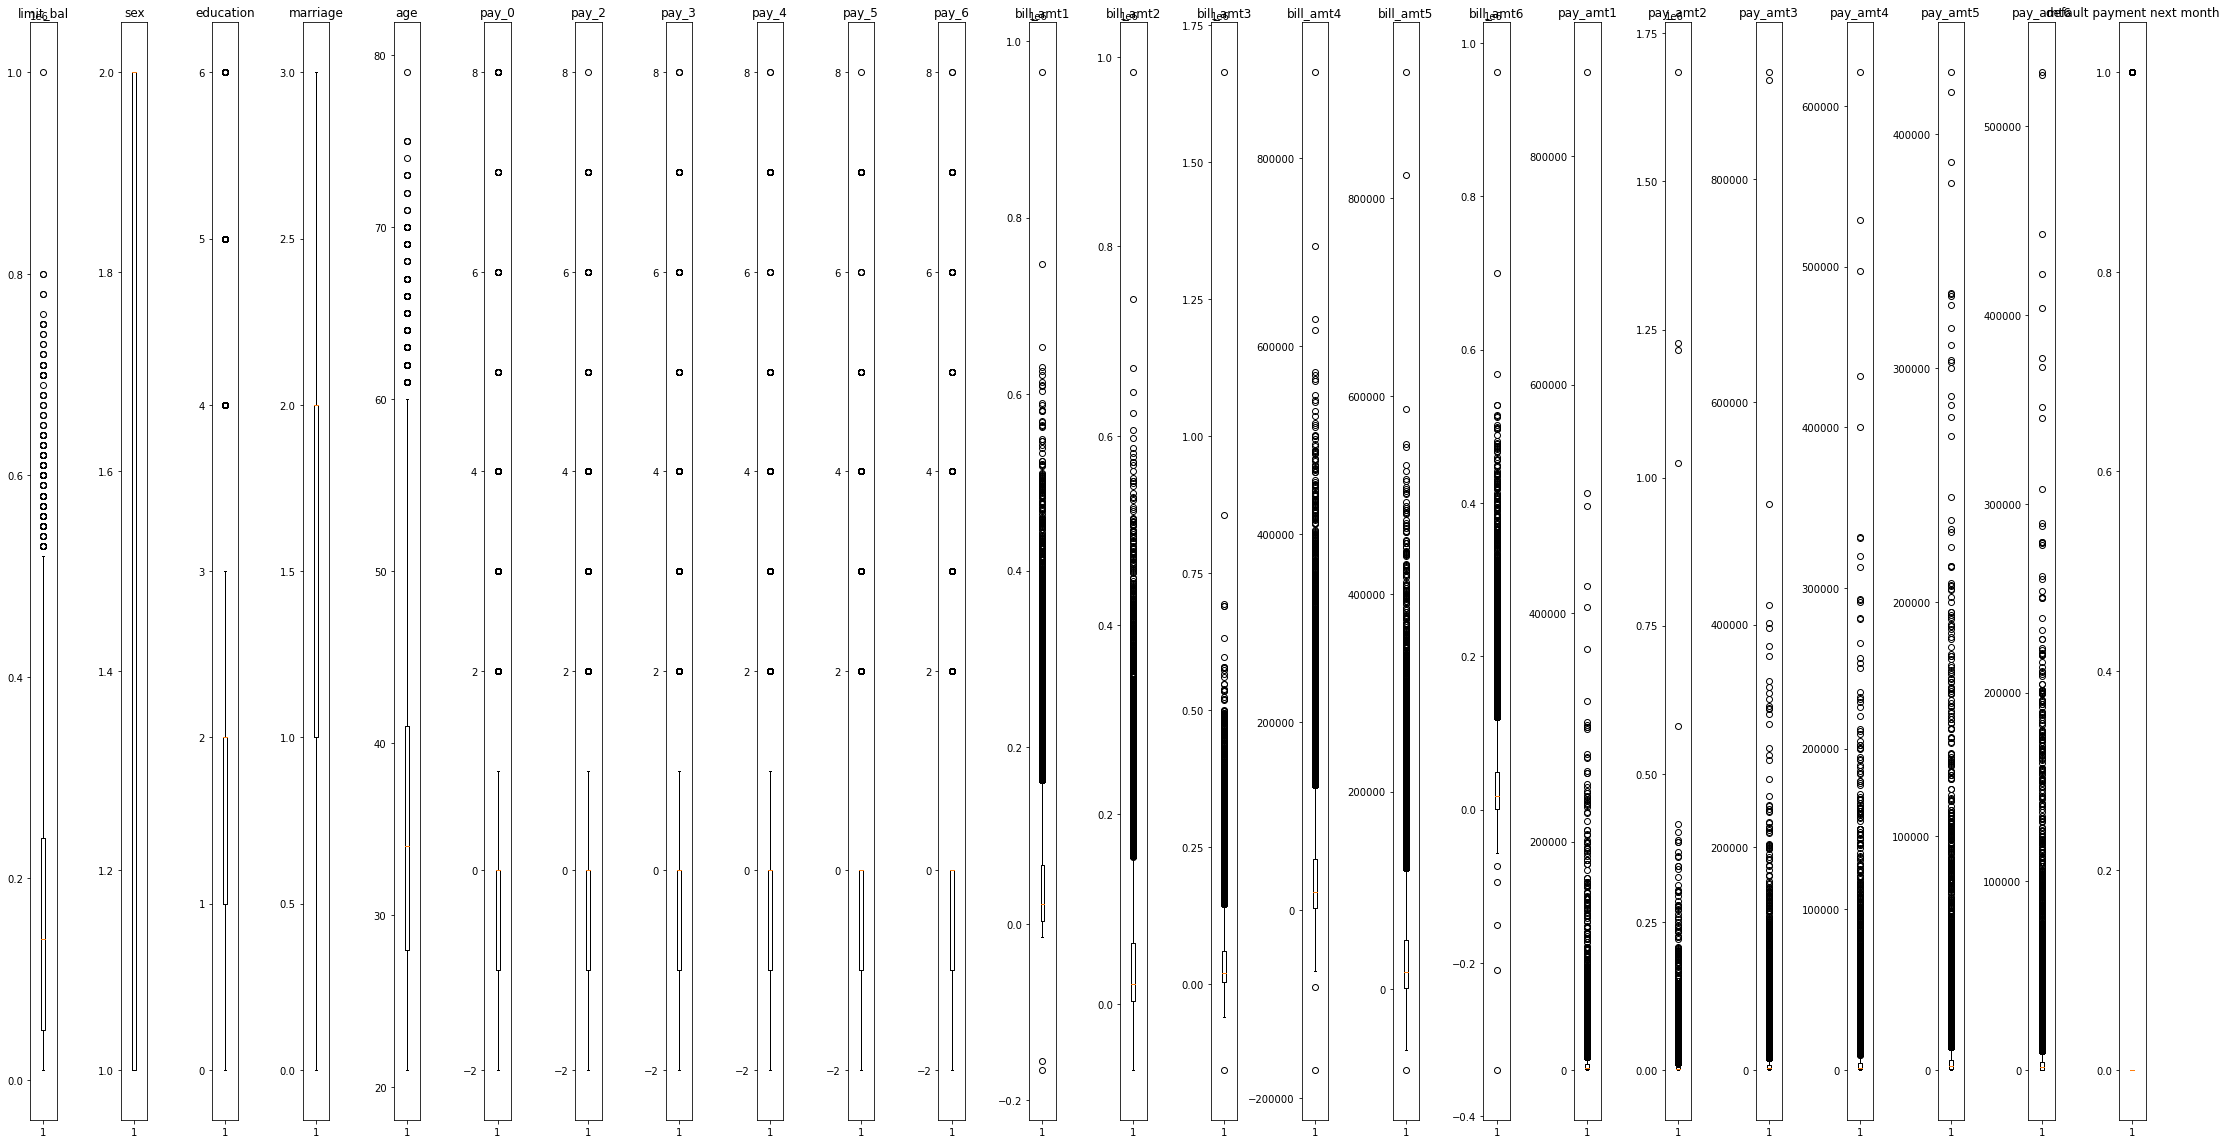

                           whisker_low         min        q1         q2  \
column_name                                                               
limit_bal                   -235000.00    10000.00  50000.00  140000.00   
sex                              -0.50        1.00      1.00       2.00   
education                        -0.50        0.00      1.00       2.00   
marriage                         -0.50        0.00      1.00       2.00   
age                               8.50       21.00     28.00      34.00   
pay_0                            -2.50       -2.00     -1.00       0.00   
pay_2                            -2.50       -2.00     -1.00       0.00   
pay_3                            -2.50       -2.00     -1.00       0.00   
pay_4                            -2.50       -2.00     -1.00       0.00   
pay_5                            -2.50       -2.00     -1.00       0.00   
pay_6                            -2.50       -2.00     -1.00       0.00   
bill_amt1                

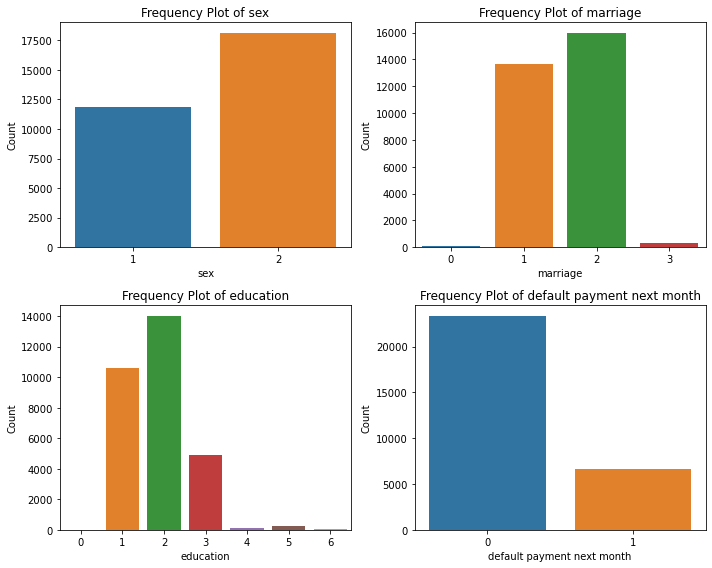

Enter column names separated by commas: sex, marriage


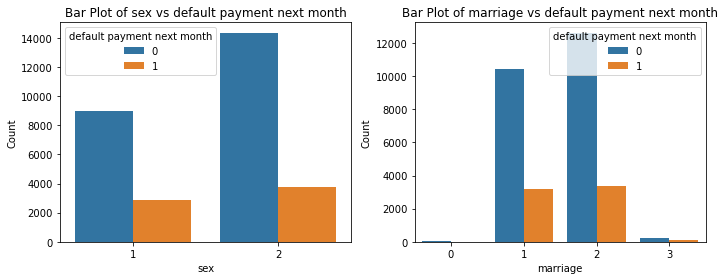

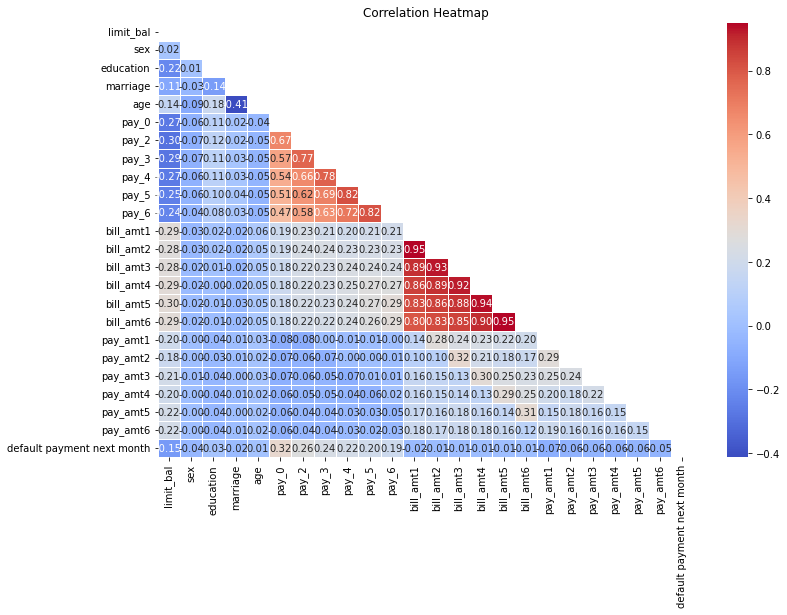

          Rows  Columns
X_train  18000        5
X_valid   6000        5
X_test    6000        5
y_train  18000        1
y_valid   6000        1
y_test    6000        1
ROC for Train Set:


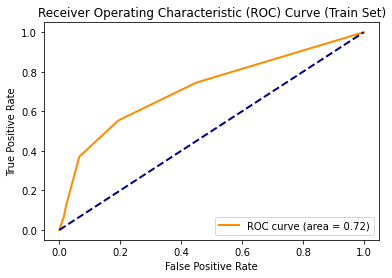

Train Set Metrics:
              precision    recall  f1-score   support

           0       0.83      0.93      0.88     13850
           1       0.63      0.37      0.47      4150

    accuracy                           0.80     18000
   macro avg       0.73      0.65      0.67     18000
weighted avg       0.79      0.80      0.78     18000

Train Precision: 0.6289
Train Recall: 0.3708
Train F1-score: 0.4666
Train AUC: 0.7177

ROC for Validation Set:


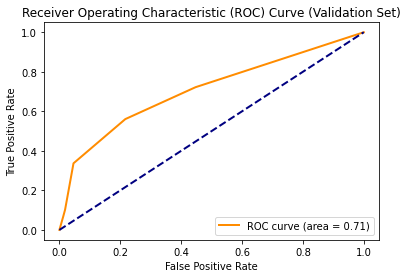

Validation Set Metrics:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      4780
           1       0.65      0.34      0.44      1220

    accuracy                           0.83      6000
   macro avg       0.75      0.65      0.67      6000
weighted avg       0.81      0.83      0.81      6000

Validation Precision: 0.6503
Validation Recall: 0.3369
Validation F1-score: 0.4438
Validation AUC: 0.7073

ROC for Test Set:


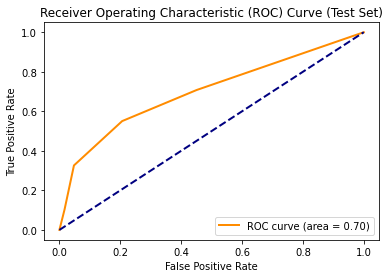

Test Set Metrics:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4734
           1       0.65      0.33      0.43      1266

    accuracy                           0.82      6000
   macro avg       0.74      0.64      0.66      6000
weighted avg       0.80      0.82      0.80      6000

Test Precision: 0.6463
Test Recall: 0.3262
Test F1-score: 0.4336
Test AUC: 0.6998


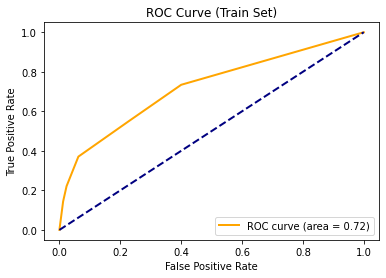

Train Set Metrics:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89     13993
           1       0.63      0.37      0.47      4007

    accuracy                           0.81     18000
   macro avg       0.73      0.65      0.68     18000
weighted avg       0.79      0.81      0.79     18000

Train Overall Precision: 0.7924
Train Overall Recall: 0.8115
Train Overall F1-score: 0.7923



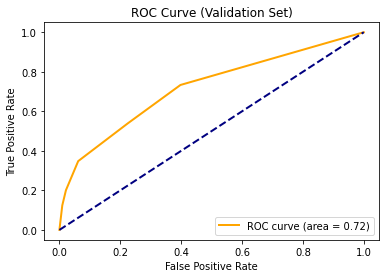

Validation Set Metrics:
              precision    recall  f1-score   support

           0       0.84      0.94      0.88      4684
           1       0.61      0.35      0.44      1316

    accuracy                           0.81      6000
   macro avg       0.72      0.64      0.66      6000
weighted avg       0.79      0.81      0.79      6000

Validation Overall Precision: 0.7876
Validation Overall Recall: 0.8088
Validation Overall F1-score: 0.7879



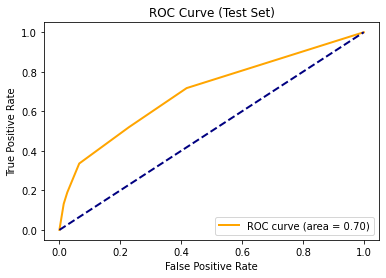

Test Set Metrics:
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      4687
           1       0.59      0.34      0.43      1313

    accuracy                           0.80      6000
   macro avg       0.71      0.64      0.65      6000
weighted avg       0.78      0.80      0.78      6000

Test Overall Precision: 0.7809
Test Overall Recall: 0.8038
Test Overall F1-score: 0.7824


In [52]:
master_function()